In [100]:
import sqlite3

class Person:
    def __init__(self, name, age, lvl, gender):
        self.name = name
        self.age = age
        self.lvl = lvl
        self.gender = gender
    
    def __str__(self):
        return f"{self.name}, {self.age} years old, {self.lvl}, {self.gender}"
    

Text(0.5, 1.0, 'Распределение Уровней среди 48487 магов')

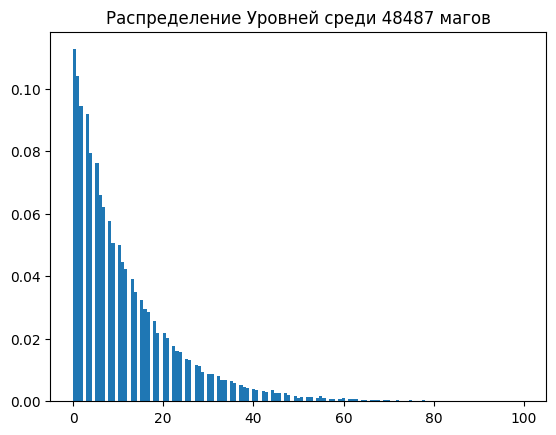

In [101]:
def sequence(mas): # Выводит последний элемент списка, находящийся внутри последовательности натуральных чисел, состоящих из уникальных чисел
       mas=list(set(mas))
       mas.sort()
       for i in range(len(mas)):
              if i!=mas[i]:
                     return mas[i-1]
       return i

import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

global lvls
checker=-1
# size_rand=10000
size_rand=40000
while checker<100:
       r = expon.rvs(size=size_rand)*12
       lvls=list(map(int,r))
       checker=sequence(lvls)
       size_rand+=250
       # print('------')
       # print(max(lvls))

def minus100(x):
       if x<=100:
              return True
       else:
              return False
lvls=[i for i in filter(minus100, lvls)]

fig, ax = plt.subplots(1, 1)
ax.hist(lvls, density=True, bins='auto')
plt.title(f'Распределение Уровней среди {len(lvls)} магов')

In [102]:
def find_n(x,n=2):
    if x>=10*(n-1) and x<10*n:
        return True
    else:
        return False
for q in range(1,11):
    seqs=[i for i in filter(lambda seq: find_n(seq,n=q), lvls)] #lambda нужна чтобы вставить в вызывающуюся фукнцию дополнительную переменную (обычно filter не позволяет это сделать)
    print(f"heroes in range from {10*(q-1)} to {10*(q)}: {len(seqs)}")

heroes in range from 0 to 10: 27345
heroes in range from 10 to 20: 12012
heroes in range from 20 to 30: 5174
heroes in range from 30 to 40: 2248
heroes in range from 40 to 50: 994
heroes in range from 50 to 60: 384
heroes in range from 60 to 70: 184
heroes in range from 70 to 80: 85
heroes in range from 80 to 90: 41
heroes in range from 90 to 100: 19


In [103]:
def GeneratorPersons(nums=1,stage=-1):
    import random
    from pynames import GENDER, LANGUAGE
    from pynames.generators.elven import DnDNamesGenerator
    elven_generator = DnDNamesGenerator()   
    genders=['Male','Female']
    ages=[i for i in range(15,40)]
    data=[]
    for c in range(nums):
        #GENDER
        gender=random.choice(genders)
        #NAME
        if gender=='Male':
            name=elven_generator.get_name_simple(GENDER.MALE)
        else:
            name=elven_generator.get_name_simple(GENDER.FEMALE)
        #LVL
        lvl=random.choice(lvls)

        #AGE
        age=random.choice(ages)

        # Считывание данных и создание объекта Person
        person=[name,age,lvl,gender]
        data.append(person)
        
    return data

In [104]:

data=[]


In [105]:

data.append(GeneratorPersons(nums=10))

In [106]:
print(data)

[[["fel'Sehthilila", 17, 12, 'Male,Female'], ['Corinlon', 27, 11, 'Male,Female'], ["is'Raeratriaana", 15, 32, 'Male,Female'], ['Thernine', 33, 17, 'Male,Female'], ['Lathileath', 31, 8, 'Male,Female'], ['Sumdrimme', 24, 0, 'Male,Female'], ['Thaluthianna', 22, 7, 'Male,Female'], ['Eilali', 19, 2, 'Male,Female'], ['Dulamdar', 16, 84, 'Male,Female'], ['Gaelen', 20, 2, 'Male,Female']]]


In [111]:
import pandas as pd
df=pd.DataFrame(data,columns=['Name','Age','Lvl','Gender'])
df.transpose()

,0
0,"[fel'Sehthilila, 17, 12, Male,Female]"
1,"[Corinlon, 27, 11, Male,Female]"
2,"[is'Raeratriaana, 15, 32, Male,Female]"
3,"[Thernine, 33, 17, Male,Female]"
4,"[Lathileath, 31, 8, Male,Female]"
5,"[Sumdrimme, 24, 0, Male,Female]"
6,"[Thaluthianna, 22, 7, Male,Female]"
7,"[Eilali, 19, 2, Male,Female]"
8,"[Dulamdar, 16, 84, Male,Female]"
9,"[Gaelen, 20, 2, Male,Female]"


In [112]:
df

,0,1,2,3,4,5,6,7,8,9
0,"[fel'Sehthilila, 17, 12, Male,Female]","[Corinlon, 27, 11, Male,Female]","[is'Raeratriaana, 15, 32, Male,Female]","[Thernine, 33, 17, Male,Female]","[Lathileath, 31, 8, Male,Female]","[Sumdrimme, 24, 0, Male,Female]","[Thaluthianna, 22, 7, Male,Female]","[Eilali, 19, 2, Male,Female]","[Dulamdar, 16, 84, Male,Female]","[Gaelen, 20, 2, Male,Female]"
